In [1]:
from google.colab import files
uploaded = files.upload()

Saving INF2178_A3_data.csv to INF2178_A3_data.csv


# 2178 Assignment3
# Student name:Jianheng Chen
# Student number:1005680746
# Instructor:Shion Guha
# Course:INF2178

## Importing the dataset

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
%pip install dfply
from dfply import *
%pip install pingouin
from pingouin import ancova
# Load the dataset
data = pd.read_csv('INF2178_A3_data.csv')

# Display the first few rows, we need to check if there is any
# missing value like we did before
print(data.head())
data.describe(include='all')

# Check dataset info, cleaning
print(data.info())
missing = data.isnull().sum()

print(missing)
# There is no missing value in this dataset so we will not need
# to remove any rows

   fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
0             36.58          39.54                     33.822   
1             50.82          44.44                     38.147   
2             40.68          28.57                     28.108   
3             32.57          23.57                     15.404   
4             31.98          19.65                     18.727   

   springreadingscore  springmathscore  springgeneralknowledgescore  \
0               49.37            50.10                       40.533   
1               83.50            58.93                       37.409   
2               40.41            32.81                       29.312   
3               34.14            35.25                       27.382   
4               32.84            23.60                       26.977   

   totalhouseholdincome  incomeinthousands  incomegroup  
0              140000.0              140.0            3  
1              120000.0              120.0            3  
2       

## EDA

In [49]:
# In this part we will show the summary stastistic first
print(data.describe())

       fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
count      11933.000000   11933.000000               11933.000000   
mean          35.954215      27.128244                  23.073694   
std           10.473130       9.120505                   7.396978   
min           21.010000      10.510000                   6.985000   
25%           29.340000      20.680000                  17.385000   
50%           34.060000      25.680000                  22.954000   
75%           39.890000      31.590000                  28.305000   
max          138.510000     115.650000                  47.691000   

       springreadingscore  springmathscore  springgeneralknowledgescore  \
count        11933.000000     11933.000000                 11933.000000   
mean            47.511178        37.799461                    28.235584   
std             14.327111        12.027753                     7.577457   
min             22.350000        11.900000                     7.858000   
25%

In [50]:
# We will only choose the dataset of our interest
df = pd.DataFrame(data = data, columns=['fallreadingscore', 'fallmathscore', 'fallgeneralknowledgescore',
                           'springreadingscore', 'springmathscore','springgeneralknowledgescore', 'incomegroup'])
df

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,3
1,50.82,44.44,38.147,83.50,58.93,37.409,3
2,40.68,28.57,28.108,40.41,32.81,29.312,3
3,32.57,23.57,15.404,34.14,35.25,27.382,2
4,31.98,19.65,18.727,32.84,23.60,26.977,2
...,...,...,...,...,...,...,...
11928,32.51,25.68,11.694,45.63,24.27,20.189,1
11929,31.96,25.73,21.461,47.84,40.35,32.357,1
11930,40.44,30.50,16.836,49.93,41.00,19.803,2
11931,35.51,28.96,28.864,51.60,50.27,35.991,1


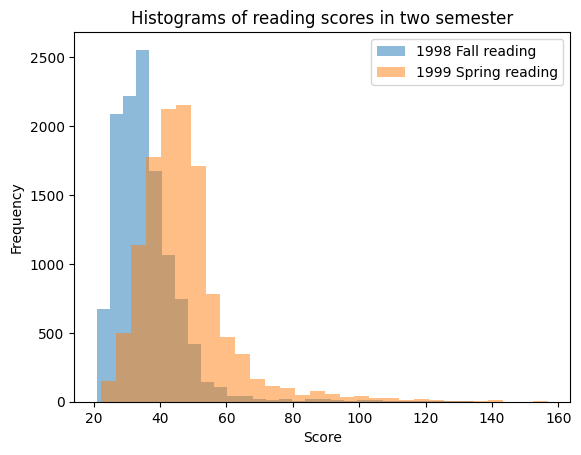

In [51]:
# See the distribution of the scores
# Create the histograms for reading scores
plt.hist(df['fallreadingscore'], bins=30, alpha=0.5, label='1998 Fall reading')
plt.hist(df['springreadingscore'], bins=30, alpha=0.5, label='1999 Spring reading')

# Add some details to make the plot more informative
plt.title('Histograms of reading scores in two semester')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

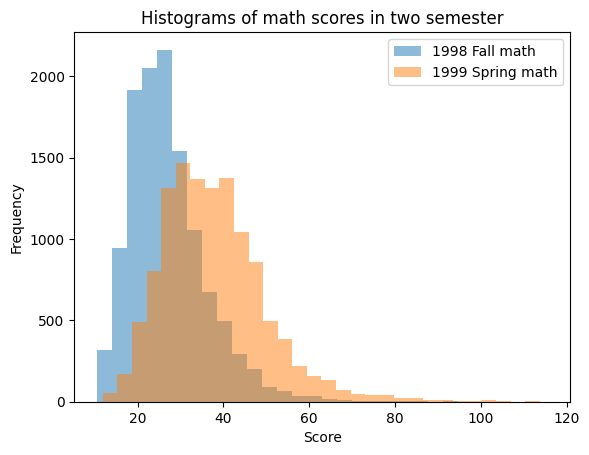

In [52]:
# With the same process, we can also see the comparison in math scores
plt.hist(df['fallmathscore'], bins=30, alpha=0.5, label='1998 Fall math')
plt.hist(df['springmathscore'], bins=30, alpha=0.5, label='1999 Spring math')

# Add some details to make the plot more informative
plt.title('Histograms of math scores in two semester')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

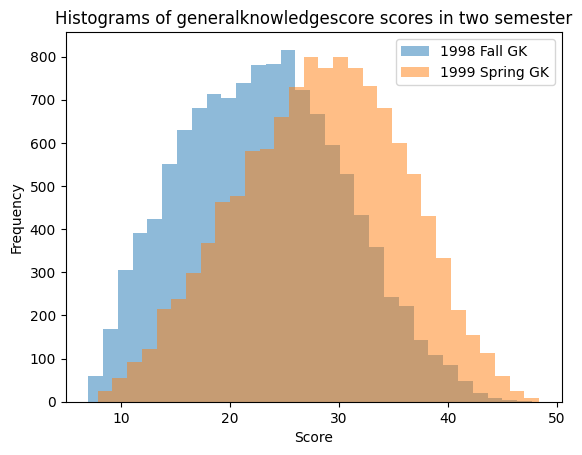

In [53]:
# For generalknowledge
plt.hist(df['fallgeneralknowledgescore'], bins=30, alpha=0.5, label='1998 Fall GK')
plt.hist(df['springgeneralknowledgescore'], bins=30, alpha=0.5, label='1999 Spring GK')
# To make the legend less corwded I used 'GK' to represent generalknowledge
# Add some details to make the plot more informative
plt.title('Histograms of generalknowledgescore scores in two semester')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

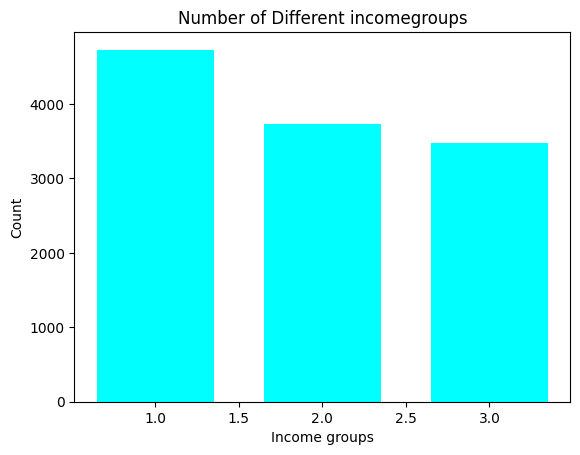

In [54]:
# Lets further check the number in different incomegroups
plt.bar(df['incomegroup'].value_counts().index, df['incomegroup'].value_counts().values,
        color='cyan', width= 0.7)
plt.xlabel('Income groups')
plt.ylabel('Count')
plt.title('Number of Different incomegroups')
plt.show()

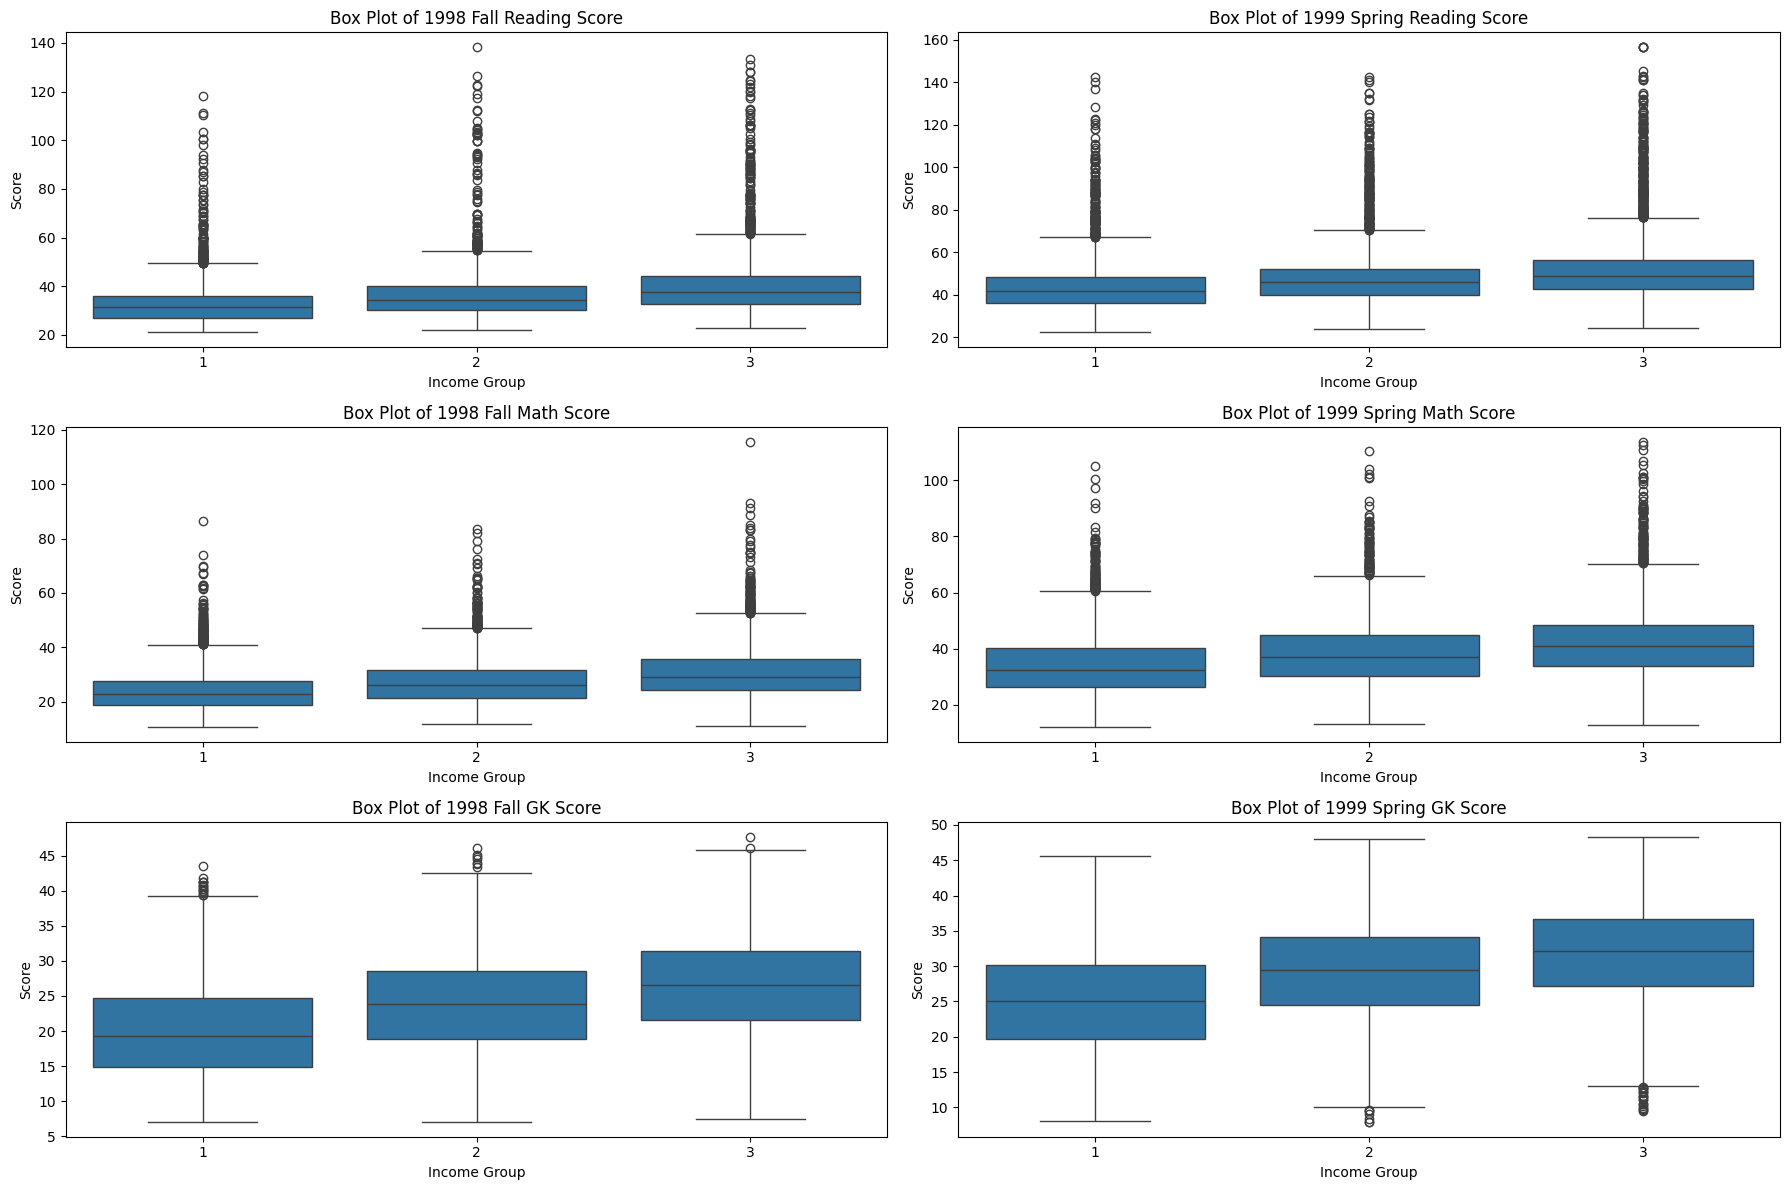

In [55]:
# Boxplots of each semester's scores
fig, axs = plt.subplots(3, 2, figsize=(18, 12))

# Plot in the first row, first column
sns.boxplot(x='incomegroup', y='fallreadingscore', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Box Plot of 1998 Fall Reading Score')
axs[0, 0].set_xlabel('Income Group')
axs[0, 0].set_ylabel('Score')

# Plot in the first row, second column
sns.boxplot(x='incomegroup', y='springreadingscore', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of 1999 Spring Reading Score')
axs[0, 1].set_xlabel('Income Group')
axs[0, 1].set_ylabel('Score')

# Plot in the second row, first column
sns.boxplot(x='incomegroup', y='fallmathscore', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Box Plot of 1998 Fall Math Score')
axs[1, 0].set_xlabel('Income Group')
axs[1, 0].set_ylabel('Score')

# Plot in the second row, second column
sns.boxplot(x='incomegroup', y='springmathscore', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Box Plot of 1999 Spring Math Score')
axs[1, 1].set_xlabel('Income Group')
axs[1, 1].set_ylabel('Score')

# Plot in the third row, first column
sns.boxplot(x='incomegroup', y='fallgeneralknowledgescore', data=df, ax=axs[2, 0])
axs[2, 0].set_title('Box Plot of 1998 Fall GK Score')
axs[2, 0].set_xlabel('Income Group')
axs[2, 0].set_ylabel('Score')

# Plot in the third row, second column
sns.boxplot(x='incomegroup', y='springgeneralknowledgescore', data=df, ax=axs[2, 1])
axs[2, 1].set_title('Box Plot of 1999 Spring GK Score')
axs[2, 1].set_xlabel('Income Group')
axs[2, 1].set_ylabel('Score')
plt.tight_layout()
plt.show()

# There are a lot of outliers, obsevrable in the disrtitbion plot

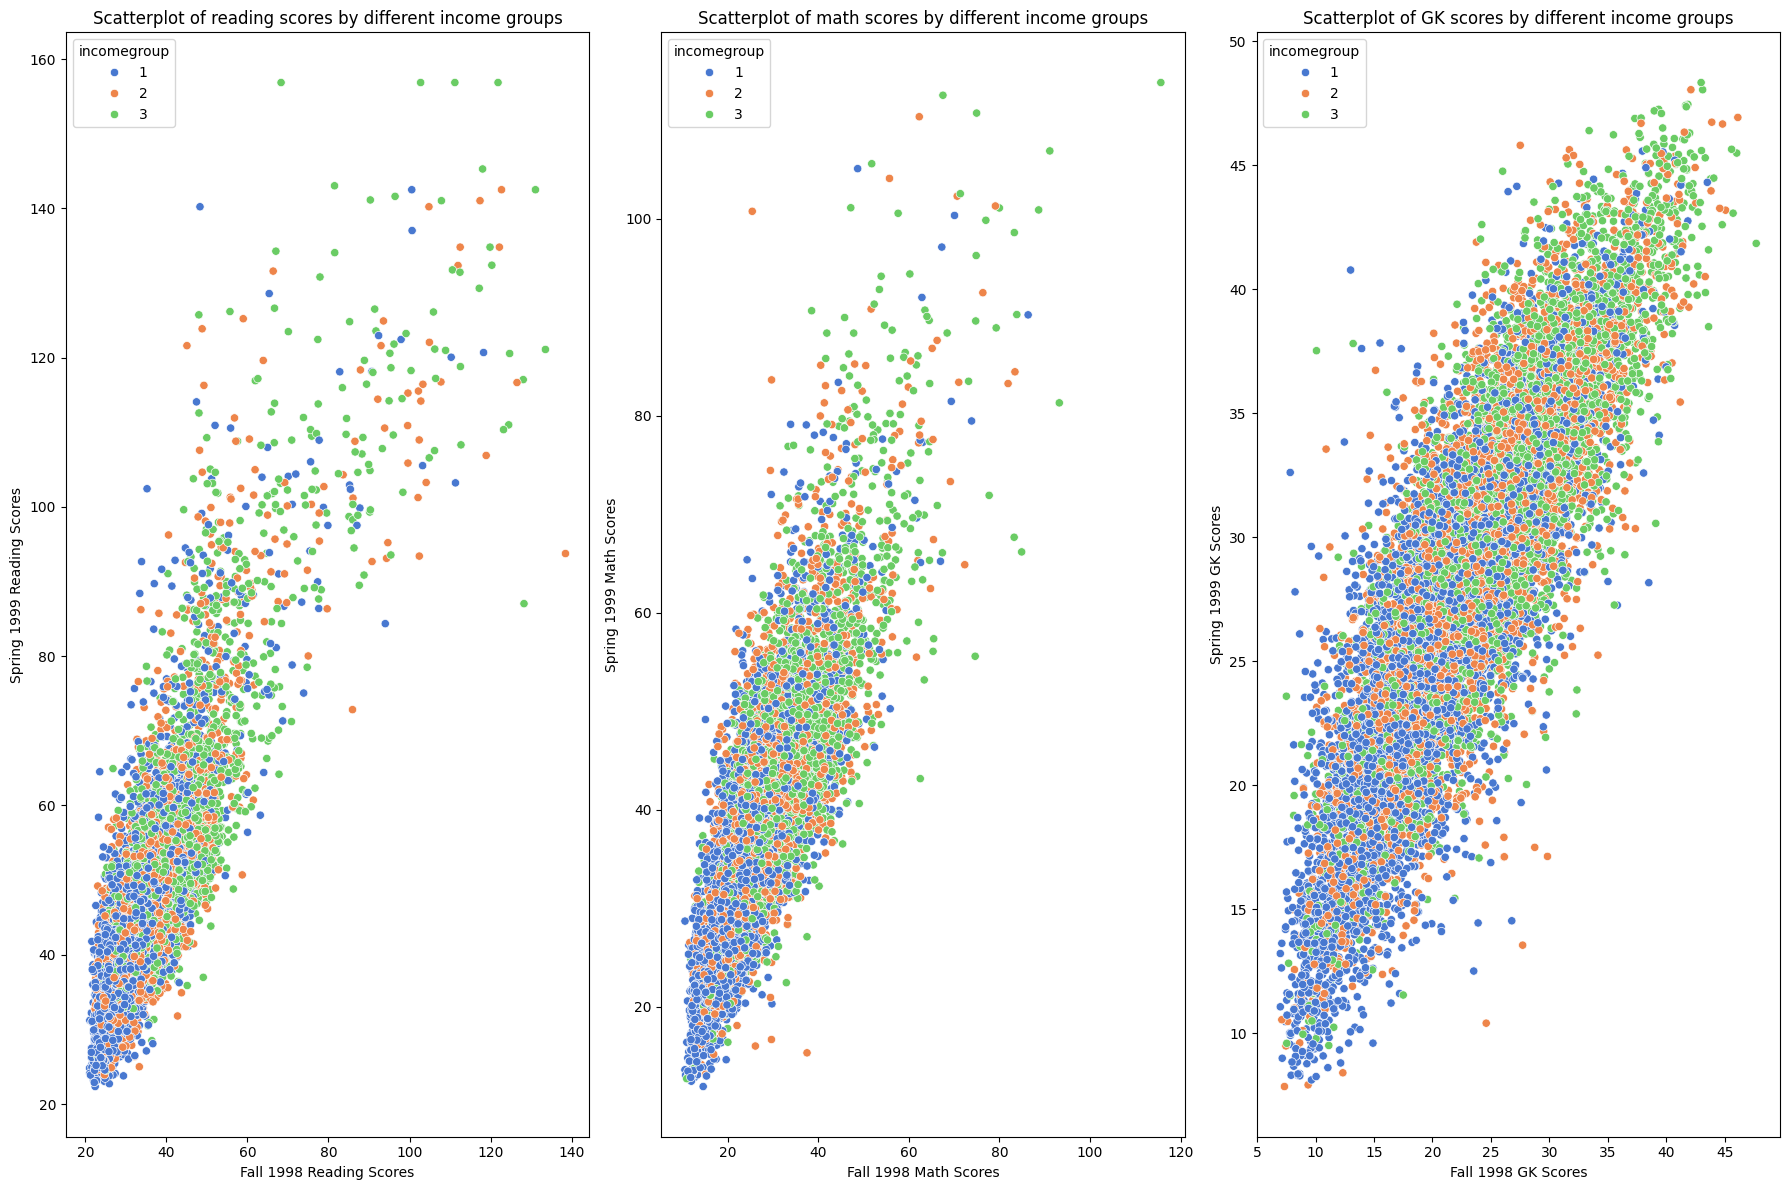

In [85]:
# Scatterplots
fig, axs = plt.subplots(1, 3, figsize=(18, 12))
sns.scatterplot(x='fallreadingscore', y='springreadingscore', hue='incomegroup', data=df, ax=axs[0], palette='muted')
axs[0].set_title('Scatterplot of reading scores by different income groups')
axs[0].set_xlabel('Fall 1998 Reading Scores')
axs[0].set_ylabel('Spring 1999 Reading Scores')

sns.scatterplot(x='fallmathscore', y='springmathscore', hue='incomegroup', data=df, ax=axs[1], palette='muted')
axs[1].set_title('Scatterplot of math scores by different income groups')
axs[1].set_xlabel('Fall 1998 Math Scores')
axs[1].set_ylabel('Spring 1999 Math Scores')

sns.scatterplot(x='fallgeneralknowledgescore', y='springgeneralknowledgescore', hue='incomegroup', data=df, ax=axs[2], palette='muted')
axs[2].set_title('Scatterplot of GK scores by different income groups')
axs[2].set_xlabel('Fall 1998 GK Scores')
axs[2].set_ylabel('Spring 1999 GK Scores')

plt.tight_layout()
plt.show()

In [57]:
# Research question 1:
# readingscore~incoemgroup
ancova(data=df, dv='springreadingscore', covar='fallreadingscore', between='incomegroup')


,Source,SS,DF,F,p-unc,np2
0,incomegroup,5.131201e+02,2,4.055660,0.017348,0.00068
1,fallreadingscore,1.547042e+06,1,24455.397576,0.000000,0.67214
2,Residual,7.546256e+05,11929,NaN,NaN,NaN


In [65]:
# Fit ANCOVA model
model1 = sm.formula.ols('springreadingscore ~ fallreadingscore + C(incomegroup)', data=df).fit()
print(model1.summary())

# Fit the ANCOVA model with interaction term
model_interaction1 = sm.formula.ols('springreadingscore ~ fallreadingscore * C(incomegroup)', data=df).fit()
print(model_interaction1.summary())


                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     8929.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:19:24   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11929   BIC:                         8.339e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5430    

In [60]:
# Research question 2:
# mathscore~incoemgroup
ancova(data=df, dv='springmathscore', covar='fallmathscore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1.712758e+03,2,18.523585,9.284861e-09,0.003096
1,fallmathscore,1.026489e+06,1,22203.081238,0.000000e+00,0.650505
2,Residual,5.514994e+05,11929,NaN,NaN,NaN


In [66]:
# Fit ANCOVA model
model2 = sm.formula.ols('springmathscore ~ fallmathscore + C(incomegroup)', data=df).fit()
print(model2.summary())

# Fit the ANCOVA model with interaction term
model_interaction2 = sm.formula.ols('springmathscore ~ fallmathscore * C(incomegroup)', data=df).fit()
print(model_interaction2.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     8469.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:19:38   Log-Likelihood:                -39804.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11929   BIC:                         7.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.2011    

In [63]:
# Research question 3:
# GKscore~incoemgroup
ancova(data=df, dv='springgeneralknowledgescore', covar='fallgeneralknowledgescore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1756.904469,2,56.908040,2.525291e-25,0.009451
1,fallgeneralknowledgescore,411876.768316,1,26682.269841,0.000000e+00,0.691049
2,Residual,184140.179925,11929,NaN,NaN,NaN


In [67]:
# Fit ANCOVA model
model3 = sm.formula.ols('springgeneralknowledgescore ~ fallgeneralknowledgescore + C(incomegroup)', data=df).fit()
print(model3.summary())

# Fit the ANCOVA model with interaction term
model_interaction3 = sm.formula.ols('springgeneralknowledgescore ~ fallgeneralknowledgescore * C(incomegroup)', data=df).fit()
print(model_interaction3.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.731
Model:                                     OLS   Adj. R-squared:                  0.731
Method:                          Least Squares   F-statistic:                 1.082e+04
Date:                         Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                                 21:19:45   Log-Likelihood:                -33259.
No. Observations:                        11933   AIC:                         6.653e+04
Df Residuals:                            11929   BIC:                         6.656e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

<Figure size 640x480 with 0 Axes>

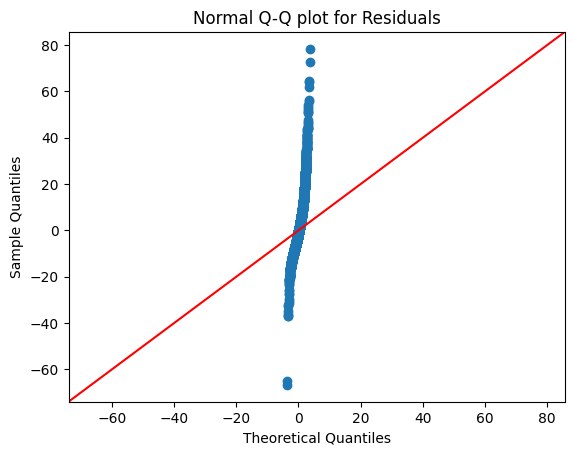

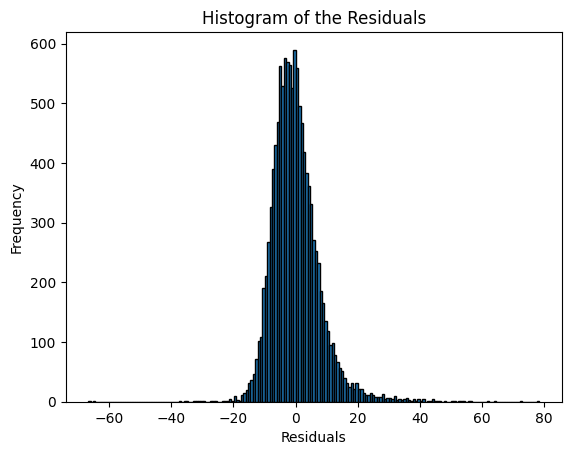

0.9124301075935364 0.0
                 Parameter     Value
0      Test statistics (T)  412.1746
1  Degrees of freedom (Df)    2.0000
2                  p value    0.0000
                 Parameter    Value
0      Test statistics (W)  39.5528
1  Degrees of freedom (Df)   2.0000
2                  p value   0.0000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [73]:
# Assumption checking for readingscore
# Assumption 1:  residuals are normally distributed
# Normality of Residuals
plt.figure()
sm.qqplot(model_interaction1.resid, line='45')
plt.title('Normal Q-Q plot for Residuals')
plt.show()

# Histogram of the residuals
plt.figure()
plt.hist(model_interaction1.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of the Residuals')
plt.show()

# Shapiro Wilk test
w, pvalue = stats.shapiro(model_interaction1.resid)
print(w,pvalue)

# Assumption 2: variances are homoegenous
res = stat()
# Bartlett's test when the sample is normally distributed
res.bartlett(df=df, res_var='springreadingscore', xfac_var='incomegroup')
print(res.bartlett_summary)

# Levene's test if the sample data is not normal distribution
res.levene(df=df, res_var='springreadingscore', xfac_var='incomegroup')
print(res.levene_summary)

<Figure size 640x480 with 0 Axes>

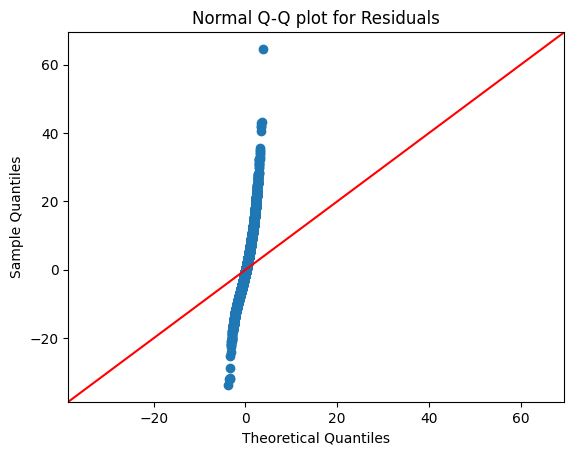

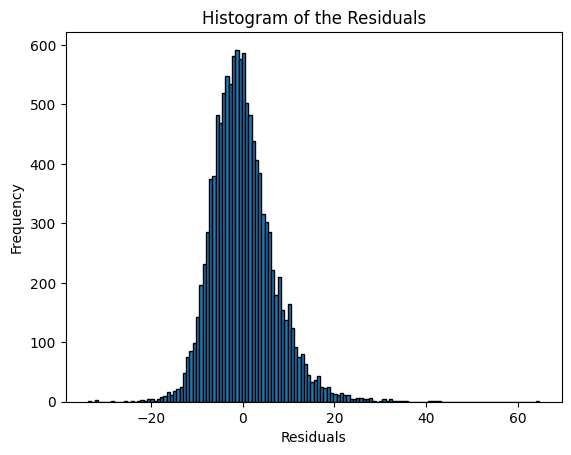

0.9651376605033875 0.0
                 Parameter     Value
0      Test statistics (T)  106.3367
1  Degrees of freedom (Df)    2.0000
2                  p value    0.0000
                 Parameter    Value
0      Test statistics (W)  18.8999
1  Degrees of freedom (Df)   2.0000
2                  p value   0.0000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [74]:
# Assumption checking for mathscore
# Assumption 1:  residuals are normally distributed
# Normality of Residuals
plt.figure()
sm.qqplot(model_interaction2.resid, line='45')
plt.title('Normal Q-Q plot for Residuals')
plt.show()

# Histogram of the residuals
plt.figure()
plt.hist(model_interaction2.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of the Residuals')
plt.show()

# Shapiro Wilk test
w, pvalue = stats.shapiro(model_interaction2.resid)
print(w,pvalue)

# Assumption 2: variances are homoegenous
res = stat()
# Bartlett's test when the sample is normally distributed
res.bartlett(df=df, res_var='springmathscore', xfac_var='incomegroup')
print(res.bartlett_summary)

# Levene's test if the sample data is not normal distribution
res.levene(df=df, res_var='springmathscore', xfac_var='incomegroup')
print(res.levene_summary)

<Figure size 640x480 with 0 Axes>

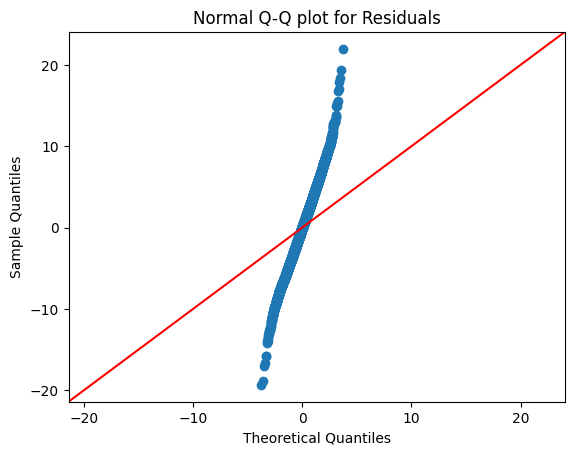

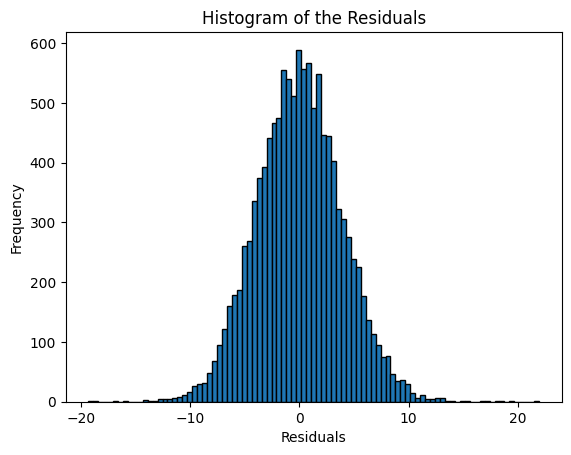

0.9980189800262451 2.61523042804912e-11
                 Parameter    Value
0      Test statistics (T)  10.4095
1  Degrees of freedom (Df)   2.0000
2                  p value   0.0055
                 Parameter   Value
0      Test statistics (W)  9.4058
1  Degrees of freedom (Df)  2.0000
2                  p value  0.0001


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [75]:
# Assumption checking for GKscore
# Assumption 1:  residuals are normally distributed
# Normality of Residuals
plt.figure()
sm.qqplot(model_interaction3.resid, line='45')
plt.title('Normal Q-Q plot for Residuals')
plt.show()

# Histogram of the residuals
plt.figure()
plt.hist(model_interaction3.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of the Residuals')
plt.show()

# Shapiro Wilk test
w, pvalue = stats.shapiro(model_interaction3.resid)
print(w,pvalue)

# Assumption 2: variances are homoegenous
res = stat()
# Bartlett's test when the sample is normally distributed
res.bartlett(df=df, res_var='springgeneralknowledgescore', xfac_var='incomegroup')
print(res.bartlett_summary)

# Levene's test if the sample data is not normal distribution
res.levene(df=df, res_var='springgeneralknowledgescore', xfac_var='incomegroup')
print(res.levene_summary)